<a href="https://colab.research.google.com/github/chanseongparkk/2022_Data_Analysis_Intern_practice/blob/main/07_12_05_%EC%A0%90%EC%B6%94%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 패키지 임포트
import pandas as pd
import numpy as np
from scipy import stats
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# os에 따른 font 깨짐 제거를 위해 font 지정

import os

if os.name == "nt":
    font_family = "Malgun Gothic"
else: #mac os
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정

sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

import warnings
warnings.filterwarnings("ignore")

### 1. 평균의 점추정

#### 1-1 데이터 생성

In [ ]:
np.random.seed(100)

math_score = pd.DataFrame(np.random.randint(25, 101, size = 500),columns = ["점수"])

#### 1-2 데이터 탐색

In [ ]:
# 요약정보

math_score.describe()

,점수
count,500.000000
mean,61.580000
std,21.513374
min,25.000000
25%,42.000000
50%,62.500000
75%,79.000000
max,100.000000


In [ ]:
# 데이터 확인

scores = np.array(math_score.점수)
scores[:5]

array([33, 49, 92, 73, 35])

In [ ]:
# 20개 샘플 추출(복원추출)

sample = np.random.choice(scores, 20)
print(sample)
print(sample.mean())
print(sample.var())
print(sample.std())

[85 91 85 81 64 96 83 68 53 52 61 80 89 32 95 64 81 72 94 92]
75.9
282.29
16.801488029338355


In [ ]:
# 표본에 따라 평균오차 확인

for i in range(10):
  sample1 = np.random.choice(scores, 20)
  print(i+1, "표본평균", sample1.mean())

1 표본평균 67.0
2 표본평균 61.55
3 표본평균 59.55
4 표본평균 62.6
5 표본평균 57.95
6 표본평균 57.8
7 표본평균 59.85
8 표본평균 65.05
9 표본평균 60.0
10 표본평균 63.05


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


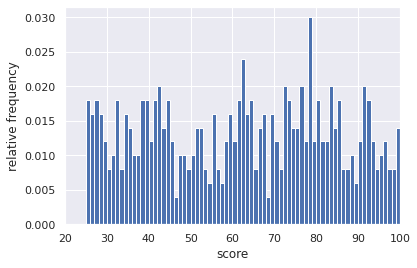

In [ ]:
# 모집단 데이터 분포 확인

plt.xlabel("score")
plt.ylabel('relative frequency')
plt.hist(scores, bins = 100, range = (0,100), density = True) #density = True면 상대도수
plt.xlim(20,100)
plt.show()

In [ ]:
# 샘플2 1000개 생성하여 분포 확인

sample_score = np.random.choice(scores, 200) 

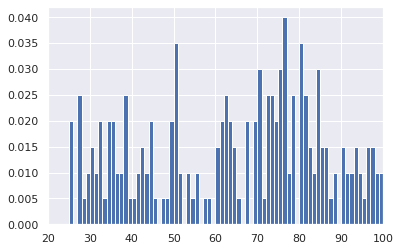

In [ ]:
plt.hist(sample_score, bins = 100, range = (0,100), density = True)
plt.xlim(20, 100)
plt.show()

#### 1-3 모평균 점추정

In [ ]:
# 20개의 표본 100번 추출

n = 20
nSample = 100

sample_mean = np.array([np.random.choice(scores,n,i).mean() for i in range(nSample)])

In [ ]:
sample_mean

In [ ]:
# 모평균
print("모평균 : ", scores.mean())

# 표본평균의 평균
print("표본평균의 평균 : ", sample_mean.mean())

# 모분산/n
print("모분산/n : ", scores.var()/n)

# 표본평균의 분산
print("표본평균의 분산 : ", sample_mean.var())

# 표본평균의 편차
print("표본평균의 편차 : ", sample_mean.std())

# 표준오차
print("표준오차 : ", scores.std()/math.sqrt(n))

모평균 :  61.58
표본평균의 평균 :  61.71939999999999
모분산/n :  23.09498
표본평균의 분산 :  23.14865364
표본평균의 편차 :  4.811304775214308
표준오차 :  4.805723670790903
